1 CREDIT CARD FRAUD DETECTION 

2 IMPORTING LIBRARIES 

The code imports essential libraries for data analysis, visualization, and machine learning. pandas (pd) is used for data manipulation, numpy (np) for numerical computing, matplotlib.pyplot (plt) for plotting, and seaborn (sns) for enhanced visualization. The sklearn library is imported for machine learning tasks, including data splitting (train_test_split), feature scaling (StandardScaler), logistic regression (LogisticRegression), and evaluation metrics (accuracy_score, f1_score, confusion_matrix, precision_score, recall_score). These libraries provide the necessary tools for data analysis, model training, evaluation, and visualization in a concise manner.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

3 DATA UNDERSTANDING

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

In [5]:
# first 5 rows of the dataset
credit_card_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
#last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#This Dataset is highly unblanced
#0 --> Normal Transaction
#1 --> fraudulent transaction

4 DATA CLEANING AND EDA

The code includes two important stages: data cleaning and exploratory data analysis (EDA). In the data cleaning stage, the dataset is loaded from a CSV file, and any missing values in the dataset are checked using isnull().sum(). This step ensures that the dataset is complete and ready for analysis. 
Moving on to EDA, various operations are performed to gain insights into the dataset. This includes displaying the first and last few rows of the data, retrieving dataset information using info(), and examining the distribution of the target variable using value_counts(). Additionally, the dataset is divided into subsets based on the target variable, and descriptive statistics are calculated for specific columns. These steps provide an overview of the dataset's structure, characteristics, and potential patterns.

In [9]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# fraud.Amount.describe()

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#Under-Sampling
#Undersampling is a technique to address class imbalance problems in datasets.

In [13]:
legit_sample = legit.sample(n=492)

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274397,165990.0,-0.746157,1.572598,-1.653234,-0.858488,0.870433,-1.018879,0.622427,0.484473,-0.601946,...,0.530446,1.411627,-0.207804,0.507194,-0.480603,0.569579,-0.199672,0.127332,6.75,0
93067,64237.0,1.583990,-0.896846,0.017829,-1.732892,-0.803217,-0.014316,-0.968649,-0.097462,-2.213126,...,-0.232602,-0.215974,-0.126032,-0.827349,0.559813,-0.154092,0.035218,-0.000565,1.00,0
26163,33937.0,-0.955349,-0.716527,1.604264,-1.728043,-1.314129,0.186735,0.883412,0.020258,-1.537639,...,0.430714,0.541424,0.516554,-0.016773,-0.011533,-0.467257,0.001029,0.130394,307.75,0
132451,79991.0,-1.237943,0.861931,2.306488,0.662973,-0.572757,0.822055,-0.685763,0.980130,-0.404764,...,0.382780,1.049058,-0.283537,-0.285533,0.227208,-0.070584,0.264657,0.053248,18.95,0
37605,39033.0,-0.954214,0.072802,1.776237,-1.111935,-2.353894,0.295413,2.731382,-0.889935,0.413562,...,-0.103536,0.286232,0.065964,0.784433,-0.553633,0.670803,-0.281751,-0.436044,472.00,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93855.199187,0.050195,0.039497,0.068422,-0.049262,0.066470,0.002457,-0.011713,-0.047813,-0.082426,...,-0.003592,-0.002159,0.044298,-0.021772,-0.052718,0.009509,0.000244,-0.017678,-0.007186,73.475813
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


5 DATA PREPROCESSING

Data preprocessing is an essential step in data analysis and machine learning. It involves preparing and transforming raw data into a format suitable for further analysis and model training. In the given code, data preprocessing is performed by separating the dataset into input features (X) and the target variable (Y).

In [19]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
274397  165990.0 -0.746157  1.572598 -1.653234 -0.858488  0.870433 -1.018879   
93067    64237.0  1.583990 -0.896846  0.017829 -1.732892 -0.803217 -0.014316   
26163    33937.0 -0.955349 -0.716527  1.604264 -1.728043 -1.314129  0.186735   
132451   79991.0 -1.237943  0.861931  2.306488  0.662973 -0.572757  0.822055   
37605    39033.0 -0.954214  0.072802  1.776237 -1.111935 -2.353894  0.295413   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(Y)

274397    0
93067     0
26163     0
132451    0
37605     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
#Split the data into Training data & Testing Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [24]:
#Model Training
#Logistic Regression

In [25]:
# Scale the input features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

6 MODEL TRAINING

In the provided code, logistic regression is chosen as the model for training. First, the input features (X_train) and the corresponding target variable (Y_train) are used to train the logistic regression model using the fit() method. This process involves iteratively adjusting the model's parameters to minimize the error between the predicted and actual values. The model is trained to recognize patterns and make predictions based on the input features. By fitting the logistic regression model to the training data, it learns the underlying patterns and relationships, allowing it to make predictions on new, unseen data. The trained model can then be used to make predictions on the testing data and evaluate its performance.

In [26]:
model = LogisticRegression()
model = LogisticRegression(max_iter=200)
model.fit(scaled_X, Y)

LogisticRegression(max_iter=200)

In [27]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [28]:
#Model Evaluation
#Accuracy Score

7 MODEL EVALUATION

The logistic regression model is evaluated using various metrics. The accuracy score is calculated to determine the proportion of correct predictions made by the model on the training and test data. Additionally, the F1 score is computed, which combines precision and recall to provide an overall measure of the model's performance. Precision reflects the ratio of correctly predicted positive instances to the total predicted positive instances, while recall measures the ratio of correctly predicted positive instances to the actual positive instances. The confusion matrix is also generated, presenting a tabular summary of the model's predictions against the actual class labels. These evaluation metrics help assess the model's ability to correctly classify instances and provide insights into its strengths and weaknesses.

In [29]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

In [31]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9529860228716646


In [32]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


In [34]:
#Calculating precision and recall_score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

In [35]:
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9375
Recall: 0.9183673469387755


In [36]:
# Calculate the F1 score
f1 = f1_score(Y_test, Y_pred)

In [37]:
print("F1 Score:", f1)

F1 Score: 0.9278350515463918


In [38]:
#computing confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[93  6]
 [ 8 90]]


8 VISUALIZATION

The seaborn library is utilized to create a heatmap visualization of the confusion matrix. The confusion matrix visually presents the model's predictions against the actual class labels, highlighting true positive, true negative, false positive, and false negative predictions. The heatmap is annotated with the corresponding counts from the confusion matrix, aiding in the interpretation and understanding of the model's performance. This visualization enables stakeholders to easily grasp the model's predictive accuracy and identify any misclassifications or biases. Visualizations play a pivotal role in effectively communicating findings and facilitating decision-making processes in data analysis and model evaluation tasks.

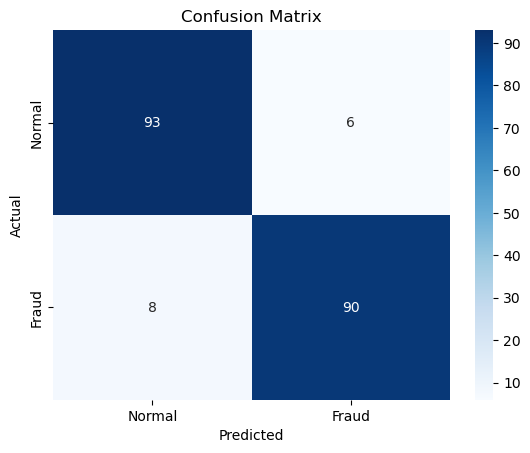

In [39]:
labels = ['Normal', 'Fraud']
sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()